Supervised Machine Learning modelling for credit risk prediction and evaluation in Malawi

In [1]:
#Importing all neccessary packages
from matplotlib.pyplot import plot as plt
import pandas as pd
import numpy as np


from functools import reduce
import statistics as sts
import time

import seaborn as sns
import plotly.express as px
from scipy.stats import shapiro
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.dummy import DummyRegressor
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score, cross_validate, GridSearchCV
from sklearn.metrics import explained_variance_score, r2_score, mean_absolute_error, mean_squared_error

from collections import Counter


from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler


# below sklearn libraries for different models
from sklearn.tree import DecisionTreeClassifier as DecisionTree
from sklearn.ensemble import RandomForestClassifier as RandomForest
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.api as sm
import statsmodels.tools.tools as smt
import statsmodels.stats.outliers_influence as smo

import datetime
from datetime import date
import re
from datetime import date, timedelta

In [2]:
thesis_df=pd.read_csv('C:\\Users\\Public\\Documents\\data\\thesis_final.csv')
thesis_df

C:\Users\Dell\AppData\Local\Temp\ipykernel_21372\992348961.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  thesis_df=pd.read_csv('C:\\Users\\Public\\Documents\\data\\thesis_final.csv')


,sex,marital_status,date_of_birth,created_at,district_id,opening_balance_local,no_of_dependents,no_of_participants,account_type_id,interest_type,...,principal_amount_local,payment_term_id,days_in_arrears,status_id,rbm_class,opening_balance,current_balance,profession,collateral_type_id,participation_code
0,MALE,MARRIED,28/08/1978,29/03/2022 09:42,0,331000.0,-1,1.0,43,2,...,330000.0,11,0.0,68,Standard,330000.0,0.00,-1.0,1.0,PERSONAL
1,MALE,SINGLE,26/03/1982,13/03/2020 05:38,0,100000.0,-1,1.0,6,3,...,100000.0,11,0.0,68,SPECIAL MENTION,100000.0,0.00,0.0,2.0,SINGLE
2,MALE,MARRIED,24/12/1973,13/03/2020 05:37,0,300000.0,-1,1.0,6,3,...,300000.0,11,0.0,68,SPECIAL MENTION,300000.0,0.00,0.0,1.0,SINGLE
3,MALE,MARRIED,18/09/1967,13/03/2020 05:37,0,150000.0,-1,1.0,6,3,...,150000.0,11,0.0,68,SPECIAL MENTION,150000.0,0.00,0.0,1.0,SINGLE
4,MALE,MARRIED,18/09/1967,13/03/2020 05:37,0,20000.0,-1,1.0,6,3,...,20000.0,11,0.0,68,SPECIAL MENTION,20000.0,0.00,0.0,1.0,SINGLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,MALE,SINGLE,3/8/1969,23/05/2022 14:00,0,500000.0,0,1.0,43,2,...,500000.0,11,371.0,35,LOSS,500000.0,425777.70,2.0,4.0,GROUP
999996,FEMALE,SINGLE,30/05/2001,23/05/2022 14:01,0,500000.0,0,1.0,43,2,...,500000.0,11,189.0,35,DOUBTFUL,500000.0,479301.37,3.0,3.0,GROUP
999997,FEMALE,SINGLE,25/05/1992,23/05/2022 14:02,0,250000.0,0,1.0,43,4,...,250000.0,11,294.0,35,DOUBTFUL,250000.0,232150.68,3.0,2.0,GROUP
999998,FEMALE,SINGLE,30/11/1985,23/05/2022 14:03,0,300000.0,0,1.0,43,4,...,300000.0,11,151.0,35,SUBSTANDARD,300000.0,278442.19,1.0,3.0,GROUP


DATA CLEANING

In [3]:
#dropping duplicates
print(f'Length before: {len(thesis_df)}')
thesis_df=thesis_df.drop_duplicates()
print(f'Length after: {len(thesis_df)}')

Length before: 1000000
Length after: 989818


In [4]:
thesis_df.columns

Index(['sex', 'marital_status', 'date_of_birth', 'created_at', 'district_id',
       'opening_balance_local', 'no_of_dependents', 'no_of_participants',
       'account_type_id', 'interest_type', 'interest_calc_method',
       'principal_amount', 'principal_amount_local', 'payment_term_id',
       'days_in_arrears', 'status_id', 'rbm_class', 'opening_balance',
       'current_balance', 'profession', 'collateral_type_id',
       'participation_code'],
      dtype='object')

In [5]:
#Procesing 'created at' column and then create 'Age' column
dates_list=[]
for s in thesis_df["created_at"]:
  dates_list.append(s[0:11])

thesis_df1=thesis_df.drop('created_at',axis=1)
column_values = pd.Series(dates_list)
dd=pd.DataFrame(dates_list,columns = ['created_at'])
thesis_df1=pd.concat([thesis_df1.reset_index(),dd],axis=1)

def parse_prefix(line, fmt):
    try:
        t = time.strptime(line, fmt)
    except ValueError as v:
        if len(v.args) > 0 and v.args[0].startswith('unconverted data remains: '):
            line = line[:-(len(v.args[0]) - 26)]
            t = time.strptime(line, fmt)
        else:
            raise
    return t

from datetime import datetime
age_list=[]
for a,b in zip(thesis_df1['created_at'],thesis_df1['date_of_birth']):
  #a=date(a)
  #b=datetime.date(b)
  date_string = a
  #datetime=datetime.date(date_string)
  #datetime=datetime.strptime(date_string, '%d/%m/%y')
  datetime=parse_prefix(date_string,'%d/%m/%Y')[0]
  #if len(date_string) !=found.end():
  #  print(date_string)
  date_string1 = b
  datetime1=parse_prefix(date_string1,'%d/%m/%Y')[0]
  #age = (datetime- datetime1) // timedelta(days=365.2425)
  age=datetime- datetime1
  age_list.append(age)
dd_age=pd.DataFrame(age_list,columns = ['Age'])
thesis_df1=pd.concat([thesis_df1,dd_age],axis=1)
thesis_df1.head()

,index,sex,marital_status,date_of_birth,district_id,opening_balance_local,no_of_dependents,no_of_participants,account_type_id,interest_type,...,days_in_arrears,status_id,rbm_class,opening_balance,current_balance,profession,collateral_type_id,participation_code,created_at,Age
0,0,MALE,MARRIED,28/08/1978,0,331000.0,-1,1.0,43,2,...,0.0,68,Standard,330000.0,0.0,-1.0,1.0,PERSONAL,29/03/2022,44
1,1,MALE,SINGLE,26/03/1982,0,100000.0,-1,1.0,6,3,...,0.0,68,SPECIAL MENTION,100000.0,0.0,0.0,2.0,SINGLE,13/03/2020,38
2,2,MALE,MARRIED,24/12/1973,0,300000.0,-1,1.0,6,3,...,0.0,68,SPECIAL MENTION,300000.0,0.0,0.0,1.0,SINGLE,13/03/2020,47
3,3,MALE,MARRIED,18/09/1967,0,150000.0,-1,1.0,6,3,...,0.0,68,SPECIAL MENTION,150000.0,0.0,0.0,1.0,SINGLE,13/03/2020,53
4,4,MALE,MARRIED,18/09/1967,0,20000.0,-1,1.0,6,3,...,0.0,68,SPECIAL MENTION,20000.0,0.0,0.0,1.0,SINGLE,13/03/2020,53


#Feature selection

In [6]:
thesis_df1=thesis_df1.drop('rbm_class',axis=1)

#Multicollinearity test for numerical variables

<Axes: >

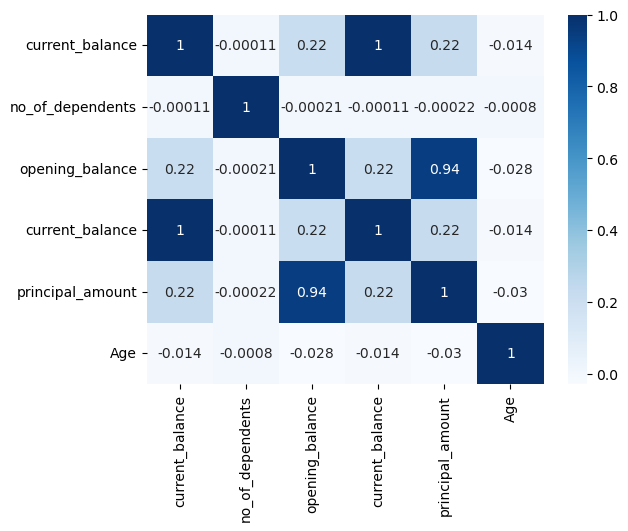

In [7]:
x=thesis_df1[['current_balance','no_of_dependents','opening_balance','current_balance','principal_amount','Age']]
#ivaricor = np.linalg.inv(a = x.corr(method='spearman'))
#ivaricor = pd.DataFrame(data=ivaricor, index=x.columns, columns=x.columns)
#print(ivaricor)

sns.heatmap(data=x.corr(), cmap="Blues", annot=True)

#Handling missing values

In [8]:
thesis_df1.isnull().sum()

index                         0
sex                           0
marital_status               84
date_of_birth                 0
district_id                   0
opening_balance_local         0
no_of_dependents              0
no_of_participants          241
account_type_id               0
interest_type                 0
interest_calc_method        188
principal_amount             42
principal_amount_local        0
payment_term_id               0
days_in_arrears              56
status_id                     0
opening_balance               0
current_balance               0
profession                52423
collateral_type_id          125
participation_code        19289
created_at                    0
Age                           0
dtype: int64

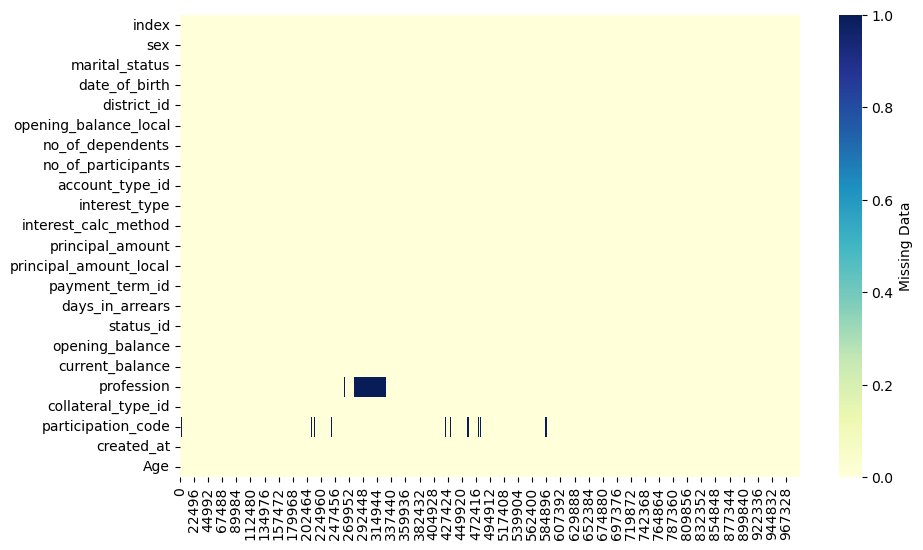

In [9]:
plt.figure(figsize=(10,6))
sns.heatmap(thesis_df1.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})
plt.savefig("visualizing_missing_data_with_heatmap_Seaborn_Python.png", dpi=100)

In [10]:
print(f'Before: {len(thesis_df1)}')
thesis_df1=thesis_df1.dropna(axis=0)
print(f'After: {len(thesis_df1)}')

Before: 989818
After: 918680


#Data cleaning variable by variable

In [11]:
#Marital status
thesis_df1["marital_status"] = thesis_df1["marital_status"].astype("category")
print(thesis_df1["marital_status"].cat.categories)

Index(['DIVORCED', 'Divorced', 'MARRIED', 'MISS', 'MR', 'MRS', 'Married',
       'SINGLE', 'SINGLE                   ', 'Single', 'UNKNOWN',
       'UNKNOWN                  ', 'Unknown', 'WIDOWED', 'Widowed'],
      dtype='object')


In [12]:
sum1=0
for n in thesis_df1["interest_type"].values:
  if n=='UNKNOWN':
    sum1+=1

print(sum1)

15783


In [13]:
thesis_df1 = thesis_df1[thesis_df1.marital_status !='UNKNOWN']
thesis_df1 = thesis_df1[thesis_df1.marital_status !='UNKNOWN                  ']
thesis_df1 = thesis_df1[thesis_df1.marital_status !='Unknown']
len(thesis_df1)

855132

In [14]:
#Sex
thesis_df1["sex"] = thesis_df1["sex"].astype("category")
print(thesis_df1["sex"].cat.categories)

Index(['FEMALE', 'Female', 'MAALE', 'MALE', 'Male', 'UNKNOWN'], dtype='object')


In [15]:
thesis_df1 = thesis_df1[thesis_df1.sex !='UNKNOWN']
len(thesis_df1)

854492

In [16]:
thesis_df1['marital_status'] = thesis_df1['marital_status'].replace(to_replace=['SINGLE', 'Single','SINGLE                   ','MISS'], value=0)
thesis_df1['marital_status'] = thesis_df1['marital_status'].replace(to_replace=['MARRIED', 'Married','MR','MRS'], value=1)
thesis_df1['marital_status'] = thesis_df1['marital_status'].replace(to_replace=['DIVORCED', 'WIDOWED','UNKNOWN','Unknown','Widowed','UNKNOWN                  ','Divorced'], value=[2,3,0,0,3,0,4])
thesis_df1['sex'] = thesis_df1['sex'].replace(to_replace=['FEMALE', 'Female','UNKNOWN'], value=0)
thesis_df1['sex'] = thesis_df1['sex'].replace(to_replace=['Male', 'MAALE','MALE'], value=1)
#thesis_df['no_of_dependents'] = thesis_df['no_of_dependents'].replace(to_replace=-1, value=3)
thesis_df1['days_in_arrears'] = thesis_df1['days_in_arrears'].replace(to_replace=-1, value=0)

In [17]:
#Number of participants
thesis_df1["no_of_participants"] = thesis_df1["no_of_participants"].astype("category")
print(thesis_df1["no_of_participants"].cat.categories)

Index([-1.0, 1.0], dtype='float64')


In [18]:
thesis_df1=thesis_df1.drop('no_of_participants',axis=1)
thesis_df1.head()

,index,sex,marital_status,date_of_birth,district_id,opening_balance_local,no_of_dependents,account_type_id,interest_type,interest_calc_method,...,payment_term_id,days_in_arrears,status_id,opening_balance,current_balance,profession,collateral_type_id,participation_code,created_at,Age
0,0,1,1,28/08/1978,0,331000.0,-1,43,2,UNKNOWN,...,11,0.0,68,330000.0,0.0,-1.0,1.0,PERSONAL,29/03/2022,44
1,1,1,0,26/03/1982,0,100000.0,-1,6,3,UNKNOWN,...,11,0.0,68,100000.0,0.0,0.0,2.0,SINGLE,13/03/2020,38
2,2,1,1,24/12/1973,0,300000.0,-1,6,3,UNKNOWN,...,11,0.0,68,300000.0,0.0,0.0,1.0,SINGLE,13/03/2020,47
3,3,1,1,18/09/1967,0,150000.0,-1,6,3,UNKNOWN,...,11,0.0,68,150000.0,0.0,0.0,1.0,SINGLE,13/03/2020,53
4,4,1,1,18/09/1967,0,20000.0,-1,6,3,UNKNOWN,...,11,0.0,68,20000.0,0.0,0.0,1.0,SINGLE,13/03/2020,53


In [19]:
#Interest type
thesis_df1 = thesis_df1[thesis_df1.interest_type !='UNKNOWN']
thesis_df1["interest_type"] = thesis_df1["interest_type"].replace(to_replace=['1','Fixed','FIXED','N/A','N\A','5','60','90'], value=1)
thesis_df1["interest_type"] = thesis_df1["interest_type"].replace(to_replace=['10','20','24','27','30','32.4','35','36','4','40','41','Floating','FLOATING','UNKNOWN','2'], value=2)
thesis_df1["interest_type"] = thesis_df1["interest_type"].replace(to_replace=['REDUCING BALANCE','3'], value=3)
thesis_df1["interest_type"] = thesis_df1["interest_type"].replace(to_replace=['STRAIGHT'], value=4)
#Interest calculation method
thesis_df1["interest_calc_method"] = thesis_df1["interest_calc_method"].replace(to_replace=['0','DECLINING / REDUCING BALANCE','Declining / Reducing Balance'], value=0)
thesis_df1["interest_calc_method"] = thesis_df1["interest_calc_method"].replace(to_replace=['FLAT RATE', 'Flat Rate','UNKNOWN'], value=1)
#payment method
thesis_df1["payment_term_id"] = thesis_df1["payment_term_id"].replace(to_replace=5, value=6)
#profession
thesis_df1["profession"] = thesis_df1["profession"].replace(to_replace=[-1.0,0.0], value=3)
thesis_df1["profession"] = thesis_df1["profession"].replace(to_replace=[1.0,2.0,3.0,4.0], value=[1,2,3,4])
#participation code
thesis_df1['participation_code'] = thesis_df1['participation_code'].replace(to_replace=['-1', '1','C001                ','UNKNOWN             ','Group               ','group               ','JOINT APPLICATION   ','                    ','GROUP               ','Joint Application   '], value=1)
thesis_df1['participation_code'] = thesis_df1['participation_code'].replace(to_replace=['PERSONAL            ', 'Personal            ','SOLE PROPRIETOR     ','SINGLE              ','Single              ','personal            ','S                   ',], value=0)
#Liability type
thesis_df1["account_type_id"] = thesis_df1["account_type_id"].replace(to_replace=[16,25,26,27,28,30,31,45,2], value=3) #General loan
thesis_df1["account_type_id"] = thesis_df1["account_type_id"].replace(to_replace=[32,33,34,35], value=42) # Business loans
thesis_df1["account_type_id"] = thesis_df1["account_type_id"].replace(to_replace=[38,17], value=46) # govt loans
thesis_df1["account_type_id"] = thesis_df1["account_type_id"].replace(to_replace=[24,39,44], value=4) # student/education loans
thesis_df1["account_type_id"] = thesis_df1["account_type_id"].replace(to_replace=[23,7], value=6)    #overdraft
thesis_df1["account_type_id"] = thesis_df1["account_type_id"].replace(to_replace=[47,22], value=9)  #mortgage
thesis_df1["account_type_id"] = thesis_df1["account_type_id"].replace(to_replace=[36], value=13)  #insurance policy
thesis_df1["account_type_id"] = thesis_df1["account_type_id"].replace(to_replace=[37,19,40,14,20], value=18)  #utilities

thesis_df1["account_type_id"] = thesis_df1["account_type_id"].replace(to_replace=[3,43], value=1) #General loan
thesis_df1["account_type_id"] = thesis_df1["account_type_id"].replace(to_replace=[42], value=2) # Business loans
thesis_df1["account_type_id"] = thesis_df1["account_type_id"].replace(to_replace=[46], value=8) # govt loans
thesis_df1["account_type_id"] = thesis_df1["account_type_id"].replace(to_replace=[41], value=9) # Agricultural
thesis_df1["account_type_id"] = thesis_df1["account_type_id"].replace(to_replace=[4], value=3) # student/education loans
thesis_df1["account_type_id"] = thesis_df1["account_type_id"].replace(to_replace=[6], value=4)    #overdraft
thesis_df1["account_type_id"] = thesis_df1["account_type_id"].replace(to_replace=[9], value=5)  #mortgage
thesis_df1["account_type_id"] = thesis_df1["account_type_id"].replace(to_replace=[13], value=6)  #insurance policy
thesis_df1["account_type_id"] = thesis_df1["account_type_id"].replace(to_replace=[18], value=7)  #utilities
#number of dependencies
thesis_df1["no_of_dependents"] = thesis_df1["no_of_dependents"].replace(to_replace=[-2,-1], value=[2,1])

In [20]:
#Target variable Status

thesis_df["status_id"] = thesis_df["status_id"].astype("category")
print(thesis_df["status_id"].cat.categories)

Index([14, 15, 35, 59, 68], dtype='int64')


C:\Users\Dell\AppData\Local\Temp\ipykernel_21372\549214432.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thesis_df["status_id"] = thesis_df["status_id"].astype("category")


In [21]:
thesis_df1['status_id'] = thesis_df1['status_id'].replace(to_replace=[14,68], value=0)
thesis_df1['status_id'] = thesis_df1['status_id'].replace(to_replace=[15,35,59], value=1)

In [22]:
#Rearranging columns

new_cols = ['index', 'sex', 'marital_status', 'date_of_birth', 'district_id',
       'opening_balance_local', 'no_of_dependents', 'account_type_id',
       'interest_type', 'interest_calc_method', 'principal_amount',
       'principal_amount_local', 'payment_term_id', 'days_in_arrears', 'opening_balance', 'current_balance',
       'profession', 'collateral_type_id', 'participation_code', 'created_at',
       'Age','status_id']
thesis_df1=thesis_df1[new_cols]
#or
thesis_df1=thesis_df1.reindex(columns=new_cols)
thesis_df1.head()

,index,sex,marital_status,date_of_birth,district_id,opening_balance_local,no_of_dependents,account_type_id,interest_type,interest_calc_method,...,payment_term_id,days_in_arrears,opening_balance,current_balance,profession,collateral_type_id,participation_code,created_at,Age,status_id
0,0,1,1,28/08/1978,0,331000.0,1,1,2,1,...,11,0.0,330000.0,0.0,3.0,1.0,0,29/03/2022,44,0
1,1,1,0,26/03/1982,0,100000.0,1,4,3,1,...,11,0.0,100000.0,0.0,3.0,2.0,0,13/03/2020,38,0
2,2,1,1,24/12/1973,0,300000.0,1,4,3,1,...,11,0.0,300000.0,0.0,3.0,1.0,0,13/03/2020,47,0
3,3,1,1,18/09/1967,0,150000.0,1,4,3,1,...,11,0.0,150000.0,0.0,3.0,1.0,0,13/03/2020,53,0
4,4,1,1,18/09/1967,0,20000.0,1,4,3,1,...,11,0.0,20000.0,0.0,3.0,1.0,0,13/03/2020,53,0


c:\Users\Dell\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


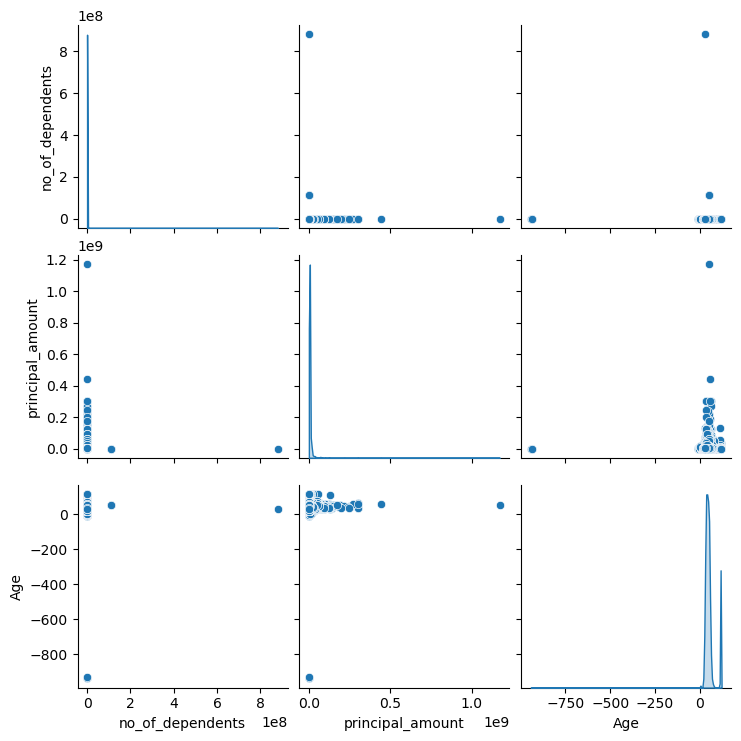

In [23]:
#dropping other unnecessary columns
thesis_df1=thesis_df1.drop('date_of_birth',axis=1)
thesis_df1=thesis_df1.drop('created_at',axis=1)
#separating independent variables from target variable
x = thesis_df1.values[:, :-1]
#get the class labels
y = thesis_df1.values[:, -1]
#Distributions of numerical features and outliers
import seaborn as sns
sns.pairplot(thesis_df1[["no_of_dependents", "principal_amount", "Age"]], diag_kind="kde")

In [24]:
#Removing outliers
def detect_outliers(df,n,features):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than n outliers according
    to the Tukey method.
    """
    outlier_indices = []

    for col in features:
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col],75)
        IQR = Q3 - Q1

        outlier_step = 2 * IQR
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        outlier_indices.extend(outlier_list_col)

    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )

    return multiple_outliers

drop = detect_outliers(thesis_df1,0,["no_of_dependents", "principal_amount", "Age"])
thesis_df1= thesis_df1.drop(drop, axis = 0).reset_index(drop=True)

c:\Users\Dell\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


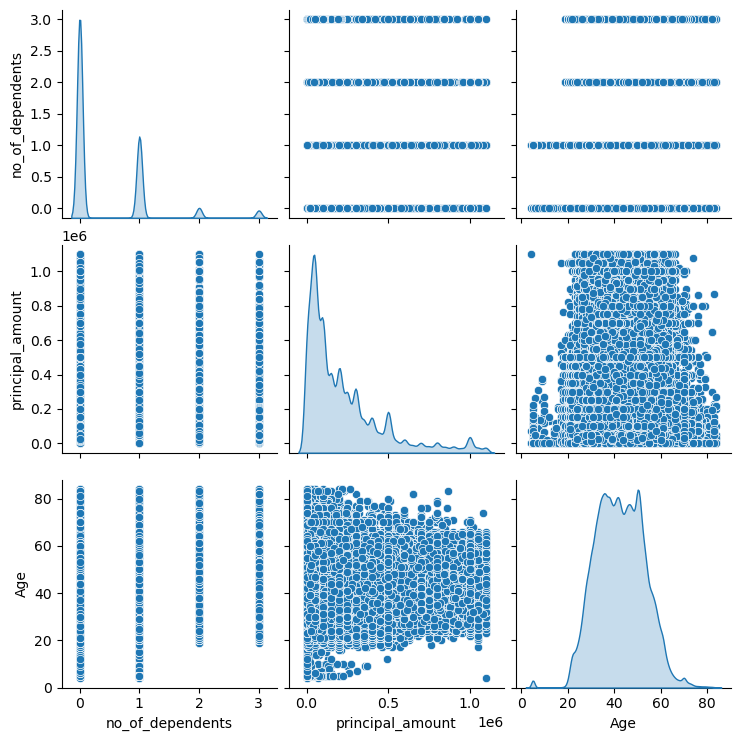

In [25]:
#distribution after removing outliers
sns.pairplot(thesis_df1[["no_of_dependents", "principal_amount", "Age"]], diag_kind="kde")

#Handling class imbalance

In [26]:
#Further cleaning
sorted_df = thesis_df1.sort_values(by='status_id')
list_status=sorted_df['status_id'].values.tolist()
list_index=sorted_df['index'].values.tolist()
# class count
class_count_0, class_count_1 = thesis_df1['status_id'].value_counts()

# Separate class
class_0 = thesis_df1[thesis_df1['status_id'] == 0]
class_1 = thesis_df1[thesis_df1['status_id'] == 1]# print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (489032, 20)
class 1: (151669, 20)


In [27]:
x1 = thesis_df1.iloc[:,:-1]
#get the class labels
y1 = thesis_df1.iloc[:,-1]
# import library
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)

# fit predictor and target variable

x_ros, y_ros = ros.fit_resample(x1, y1)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_ros))

Original dataset shape Counter({0.0: 624144, 1.0: 216434})
Resample dataset shape Counter({0: 489032, 1: 489032})


In [28]:
balanced_df=pd.concat([x_ros, y_ros],axis=1)
balanced_df.rename(columns = {'profession':'source_of_income'}, inplace = True)
balanced_df.drop(columns=['opening_balance_local','principal_amount','days_in_arrears','opening_balance','current_balance'],inplace=True)

Min-Max normalization

In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

bdata=balanced_df[['no_of_dependents','principal_amount_local','Age']]
scaler.fit(bdata)
x_no_log= pd.DataFrame(scaler.transform(bdata), columns=bdata.columns)
norm_df=pd.concat([balanced_df,x_no_log],axis=1)
new_cols1 = ['index', 'sex', 'marital_status', 'district_id', 'no_of_dependents',
       'account_type_id', 'interest_type', 'interest_calc_method',
       'principal_amount_local', 'payment_term_id', 'source_of_income',
       'collateral_type_id', 'participation_code', 'Age', 'status_id']
norm_df=norm_df[new_cols1]
#or
#norm_df=norm_df.reindex(columns=new_cols1)
norm_df.head()

,index,sex,marital_status,district_id,no_of_dependents,no_of_dependents,account_type_id,interest_type,interest_calc_method,principal_amount_local,principal_amount_local,payment_term_id,source_of_income,collateral_type_id,participation_code,Age,Age,status_id
0,0,1,1,0,1,0.333333,1,2,1,330000.0,0.006647,11,3.0,1.0,0,44,0.5000,0
1,1,1,0,0,1,0.333333,4,3,1,100000.0,0.002014,11,3.0,2.0,0,38,0.4250,0
2,2,1,1,0,1,0.333333,4,3,1,300000.0,0.006043,11,3.0,1.0,0,47,0.5375,0
3,3,1,1,0,1,0.333333,4,3,1,150000.0,0.003021,11,3.0,1.0,0,53,0.6125,0
4,4,1,1,0,1,0.333333,4,3,1,20000.0,0.000403,11,3.0,1.0,0,53,0.6125,0


In [30]:
norm_df.to_csv('C:\\Users\\Public\\Documents\\data\\clean_thesis_data.csv')

TRAINING MODELS

In [31]:
#Splitting the data into training and testing
import pandas as pd
import sklearn.model_selection as model_selection
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import seaborn as sns
models_df=norm_df
X = models_df.iloc[:,:-1]
y = models_df.iloc[:,-1]
X_train1, X_test_final, y_train1, y_test_final = model_selection.train_test_split(X, y, train_size=0.90,test_size=0.10, random_state=101)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_train1, y_train1, train_size=0.75,test_size=0.25, random_state=101)

In [32]:
#Function for the model

def ml_models(m,X_train,y_train,X_test,y_test):
  model = m
  model.fit(X_train, y_train)

  #predicting using i. all the values of 'V', ii. Training set only, iii. testing set only
  #y_pred_forest = model.predict(X)
  y_pred_train = model.predict(X_train)
  y_pred_test= model.predict(X_test)

  #monitoring model performance for the whole data(i.e. all Vs), training and testing sets using mean squared error
  #mse_forest = mean_squared_error(y, y_pred_forest)
  as_train = accuracy_score(y_train, y_pred_train)
  as_test = accuracy_score(y_test, y_pred_test)

  ps_train = precision_score(y_train, y_pred_train)
  ps_test = precision_score(y_test, y_pred_test)

  rs_train = recall_score(y_train, y_pred_train)
  rs_test = recall_score(y_test, y_pred_test)

  cm_train = confusion_matrix(y_train, y_pred_train)
  cm_test = confusion_matrix(y_test, y_pred_test)

  #roc_train = roc_curve(y_train, y_pred_train)
  #roc_test = roc_curve(y_test, y_pred_test)
  print('Training accuracy_score:',round(as_train, 2),'\n','Testing accuracy_score:',round(as_test, 2))
  print('Training confusion matrix:','\n',cm_train,'\n','Testing confusion matrix','\n',cm_test)
  print('Training precision_score:',round(ps_train, 2),'\n','Testing precision_score:',round(ps_test, 2))
  print('Training recall_score:',round(rs_train, 2),'\n','Testing recall_score:',round(rs_test, 2))
  y_pred_test_proba = model.predict_proba(X_test)[::,1]
  y_pred_train_proba = model.predict_proba(X_train)[::,1]
  fpr, tpr, _ = roc_curve(y_train,  y_pred_train_proba)
  auc = roc_auc_score(y_train,  y_pred_train_proba)
  #create ROC curve
  plt.plot(fpr,tpr)
  plt.ylabel('True Positive Rate[Sensitivity]')
  plt.xlabel('False Positive Rate[100-Specificity]')
  plt.show()
  #plotting the distribution of true and predicted values of the target variable(i.e distribution of maize yield and the model)
  #plt.scatter(X_train['index'].values,y_train.values)
  #plt.plot(X_train['index'],y_pred_train,color='black',linestyle='dotted')
  #plt.xlabel('Index')
  #plt.ylabel('Credit_status')
  #plt.legend(['True values [Maize yield]', 'Predicted values [Maize yield]'], loc=2)
  #plt.title('Simulation of Random Forest Regressor model')
  print("Area Under the Curve is : ",auc)
  return model

Training accuracy_score: 0.96 
 Testing accuracy_score: 0.96
Training confusion matrix: 
 [[319786  10184]
 [ 14693 315529]] 
 Testing confusion matrix 
 [[106702   3582]
 [  4986 104795]]
Training precision_score: 0.97 
 Testing precision_score: 0.97
Training recall_score: 0.96 
 Testing recall_score: 0.95


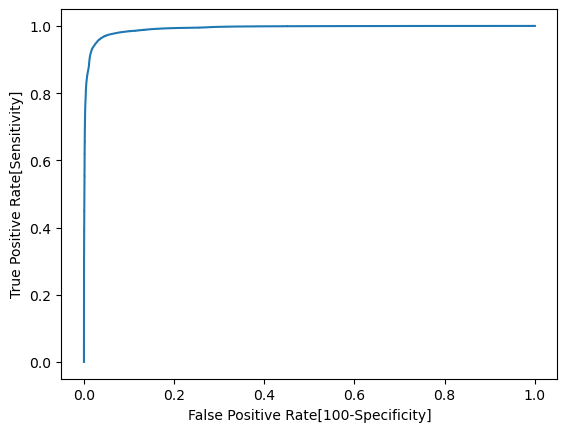

Area Under the Curve is :  0.9925013342609744


RandomForestClassifier(max_depth=12, random_state=0)

In [33]:
#Random Forest
ml_models(RandomForestClassifier(max_depth=12, random_state=0),X_train,y_train,X_test,y_test)

Training accuracy_score: 0.96 
 Testing accuracy_score: 0.96
Training confusion matrix: 
 [[317184  12786]
 [ 11493 318729]] 
 Testing confusion matrix 
 [[105782   4502]
 [  3902 105879]]
Training precision_score: 0.96 
 Testing precision_score: 0.96
Training recall_score: 0.97 
 Testing recall_score: 0.96


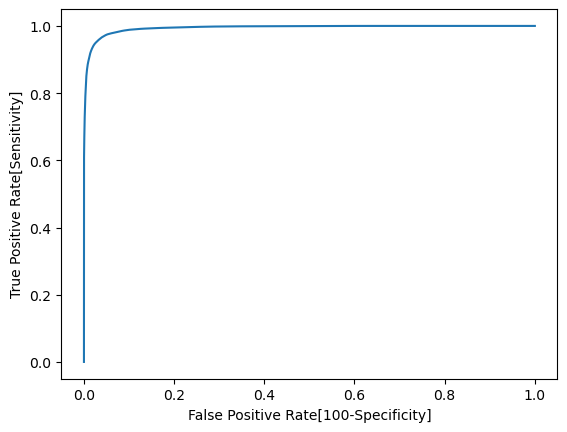

Area Under the Curve is :  0.9939875261735407


DecisionTreeClassifier(max_depth=12, random_state=0)

In [34]:
#Decision Tree
ml_models(DecisionTreeClassifier(max_depth=12, random_state=0),X_train,y_train,X_test,y_test)

In [ ]:
#Logistic Regression
ml_models(LogisticRegression(solver='saga',max_iter=250,random_state=0),X_train,y_train,X_test,y_test)

In [35]:
#SVM
ml_models(SVC(kernel='poly'),X_train,y_train,X_test,y_test)

In [ ]:
#Naive Bayes
ml_models(GaussianNB(),X_train,y_train,X_test,y_test)

In [ ]:
#KNN
ml_models(KNeighborsClassifier(8),X_train,y_train,X_test,y_test)